**Importing libraries**


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**


In [3]:
df = sns.load_dataset('mpg')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.drop(['name'], axis = 1, inplace = True)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary of the dataset**


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data pre-processing**


In [9]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum().any()

False

In [14]:
df.shape

(392, 8)

**Univariate Analysis**

In [15]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [16]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

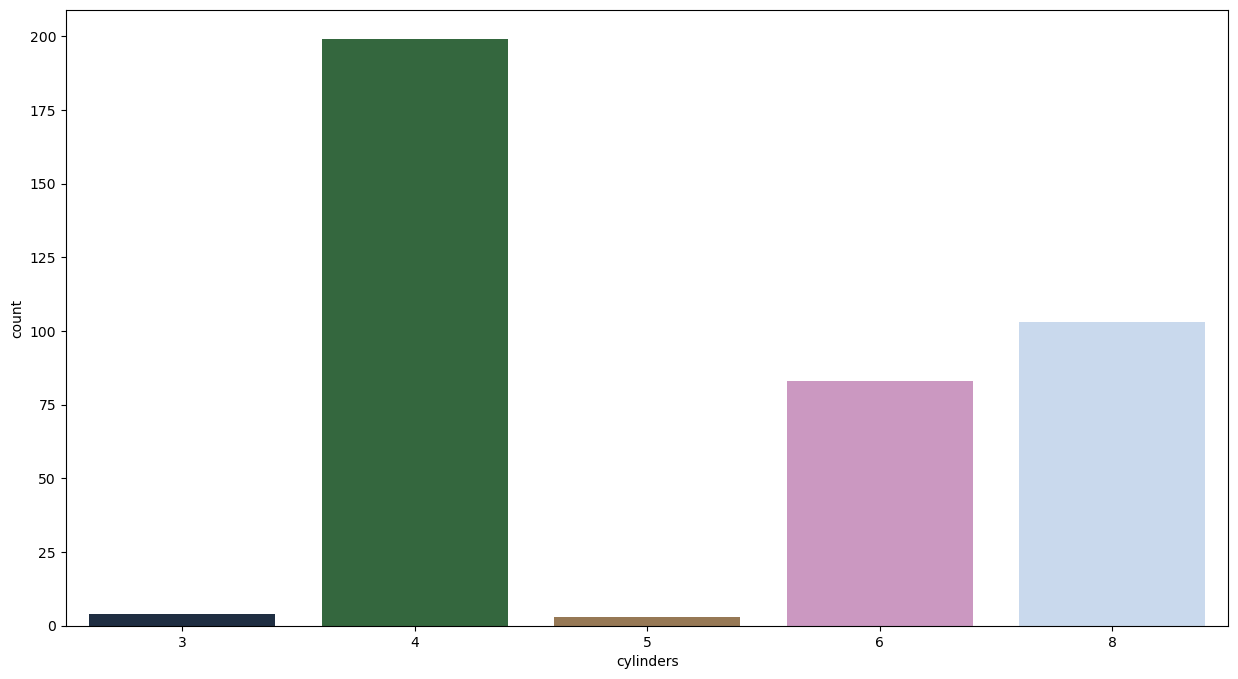

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(x="cylinders", data=df, palette="cubehelix")
plt.show()


In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [19]:
df['model_year'] = (1900 + df.model_year)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


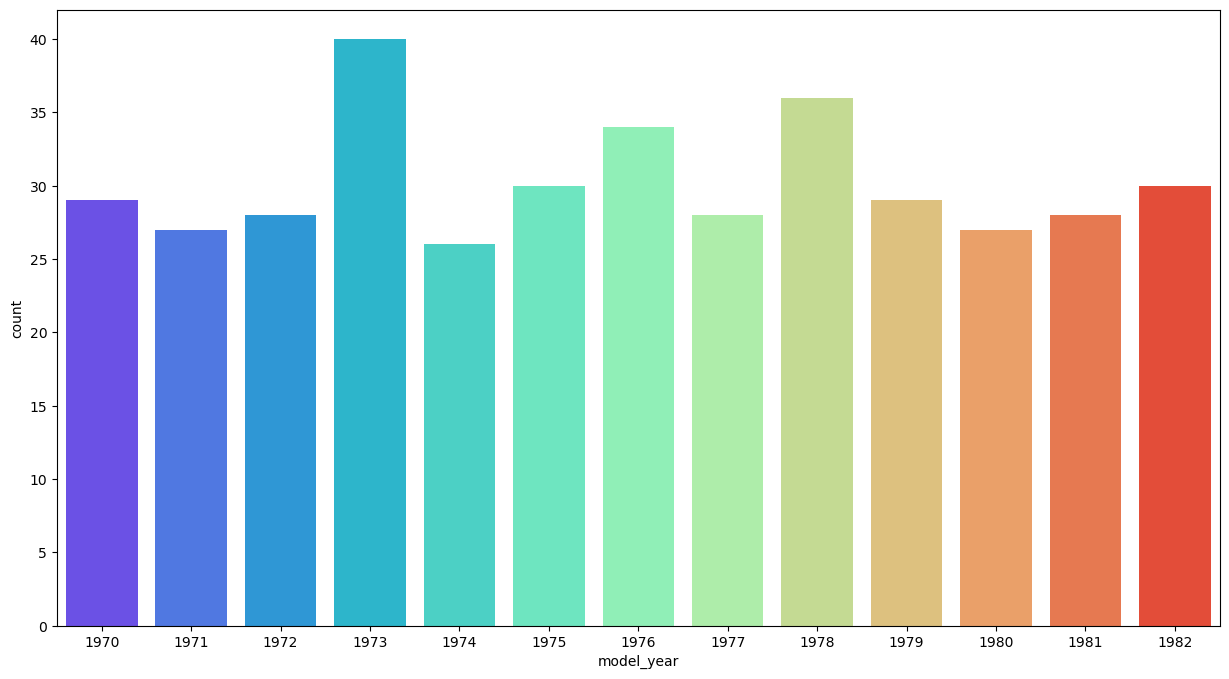

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(x="model_year", data=df, palette="rainbow")
plt.show()


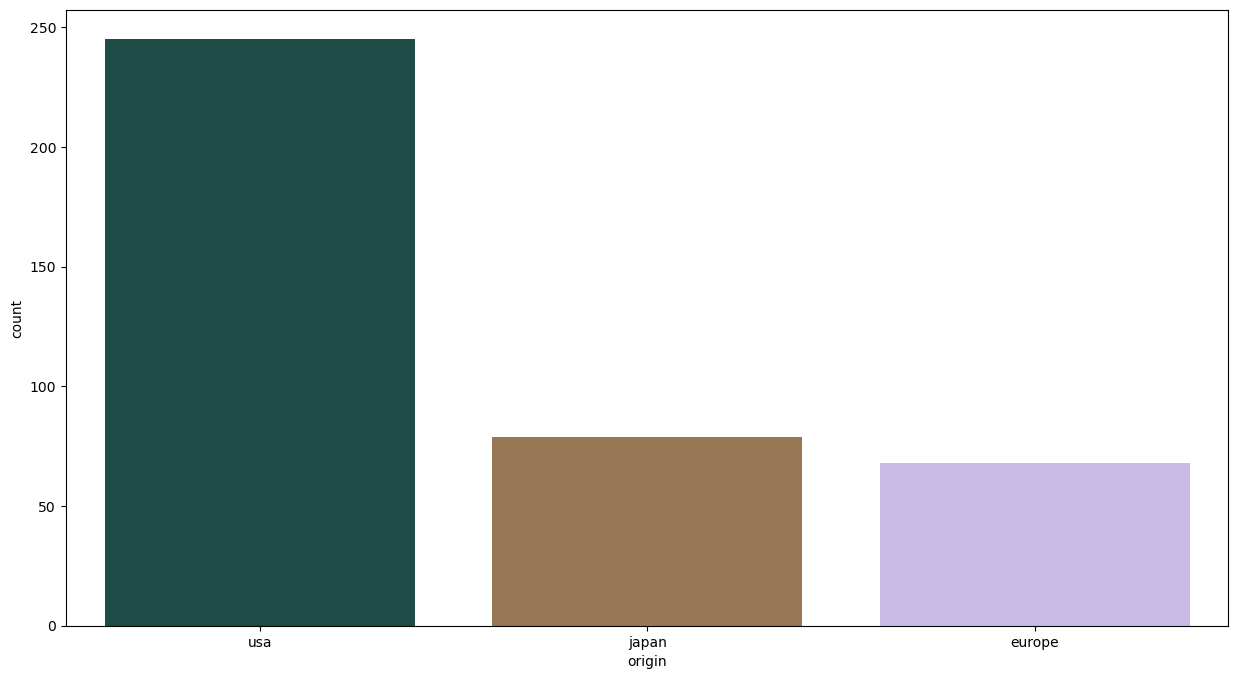

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x="origin", data=df, palette="cubehelix")
plt.show()


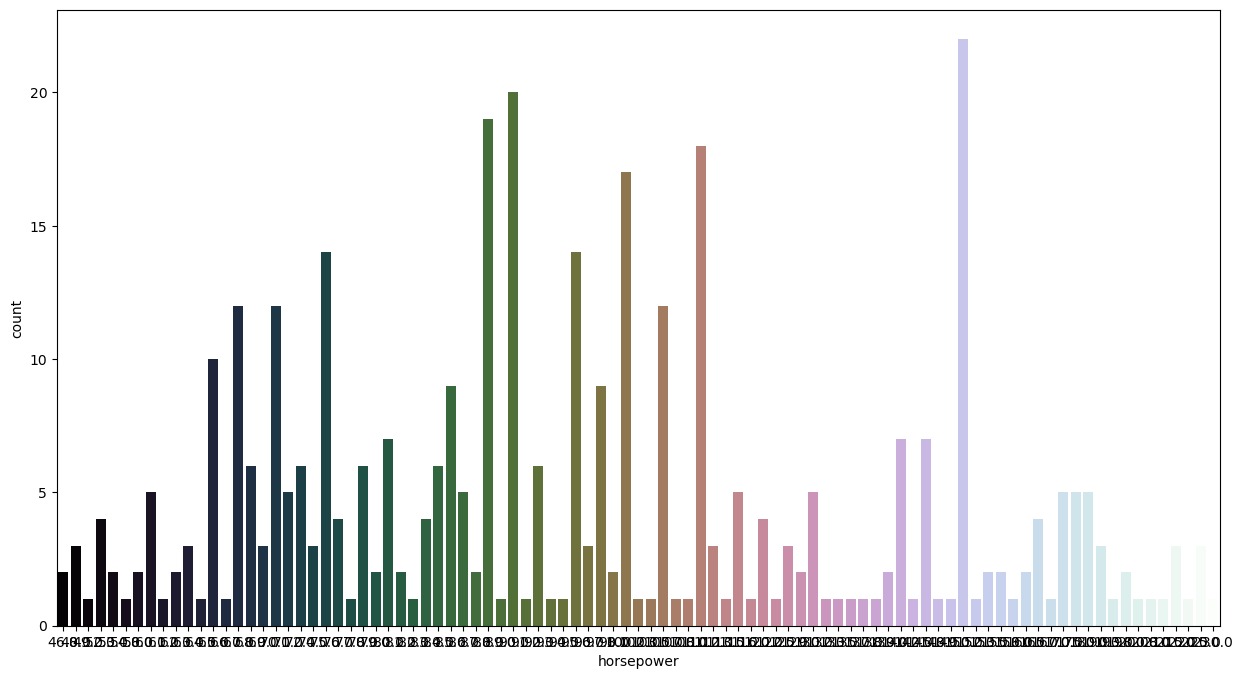

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(x="horsepower", data=df, palette="cubehelix")
plt.show()


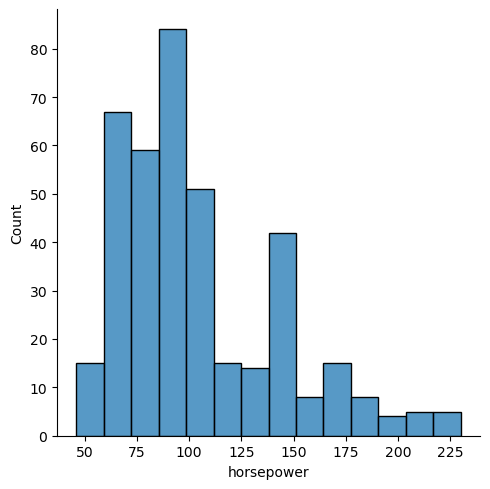

In [24]:
sns.displot(df['horsepower'])
plt.show()

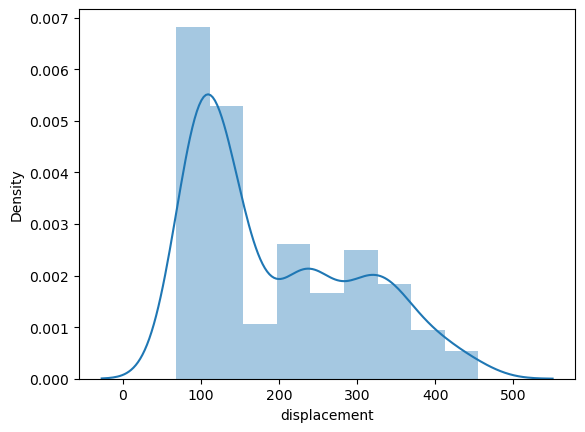

In [25]:
sns.distplot(df['displacement'])
plt.show()

**Bivariate anlysis**

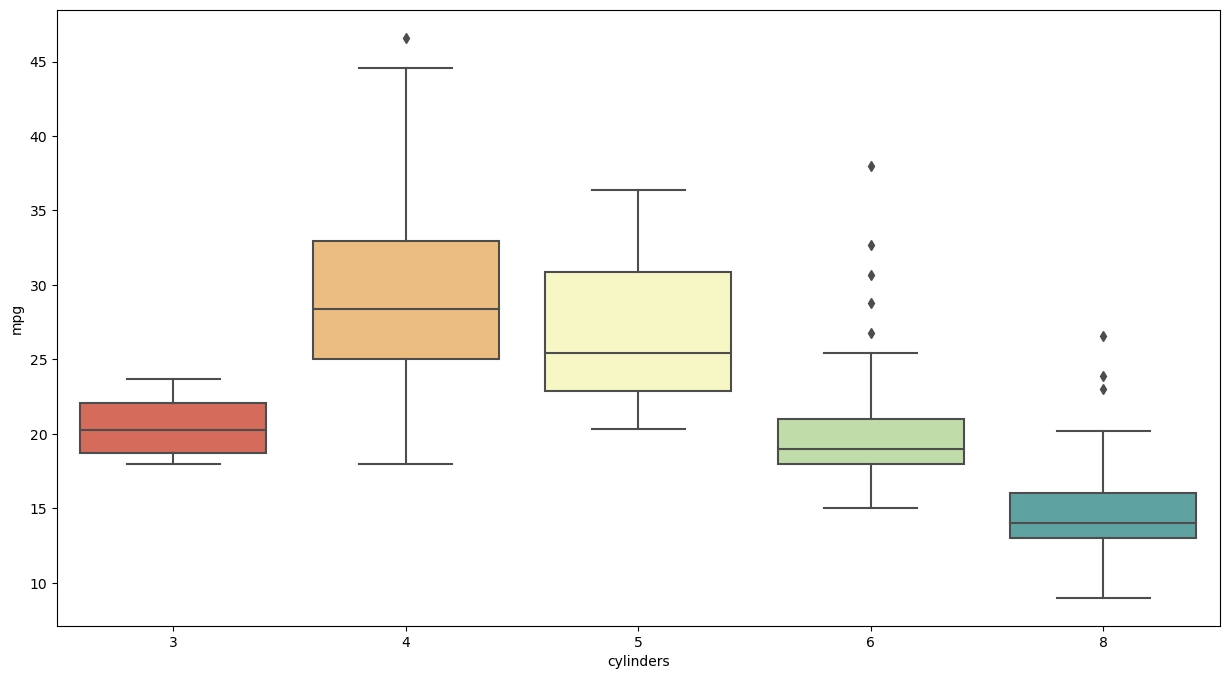

In [26]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'cylinders', y = 'mpg', data = df, palette = 'Spectral')
plt.show()

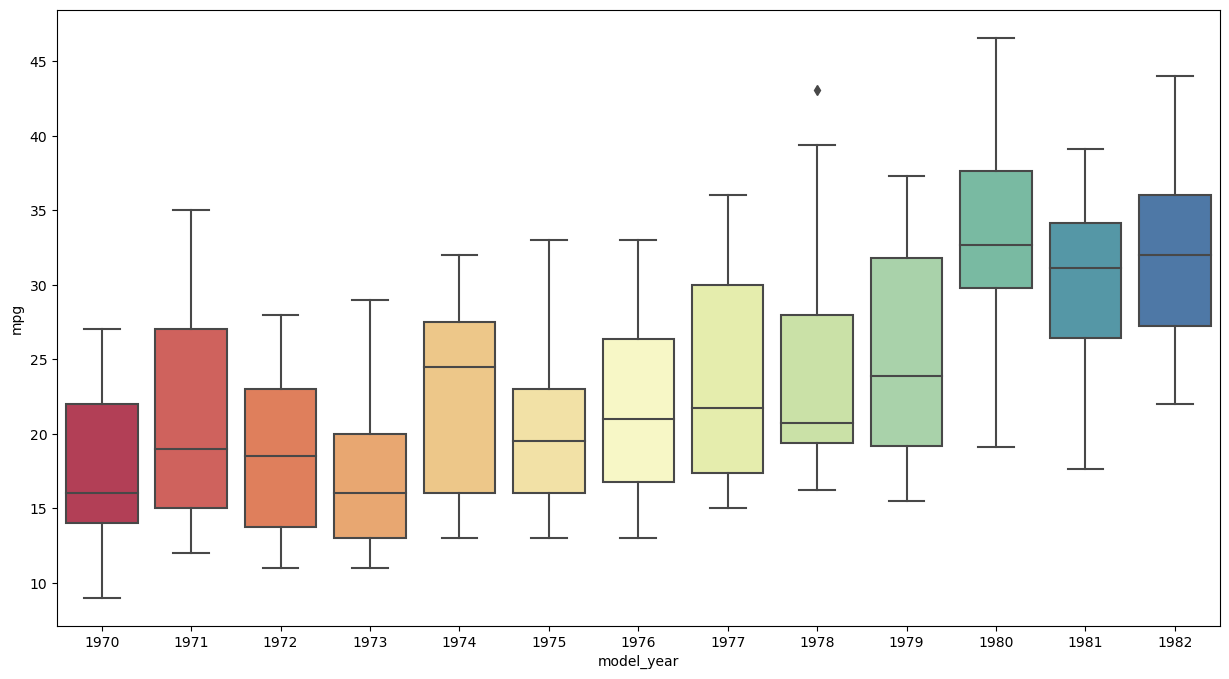

In [27]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'model_year', y = 'mpg', data = df, palette = 'Spectral')
plt.show()

**Multivariate analysis**

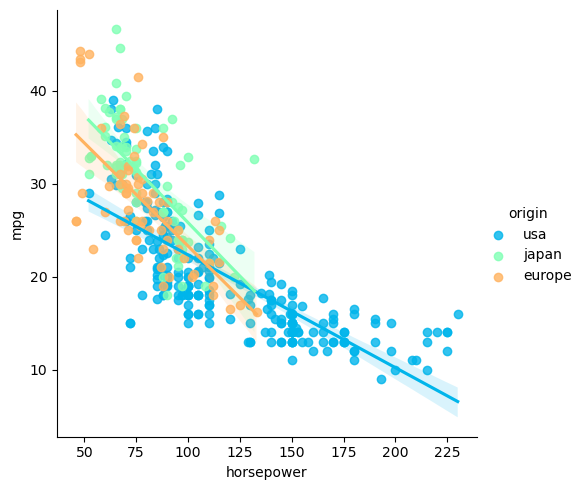

In [28]:
sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
plt.show()

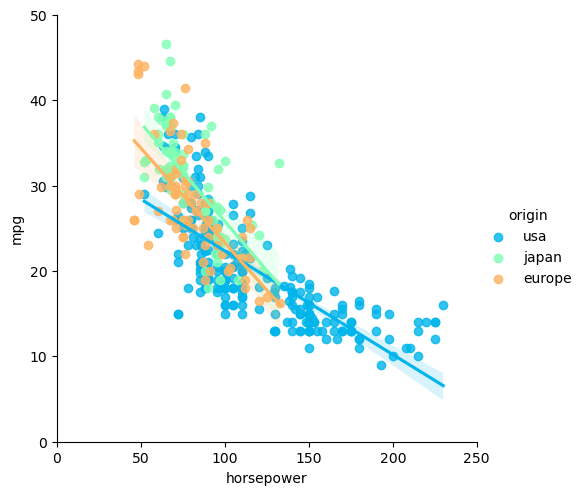

In [29]:
graph = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(xlim = (0, 250))
graph.set(ylim = (0, 50))
plt.show()

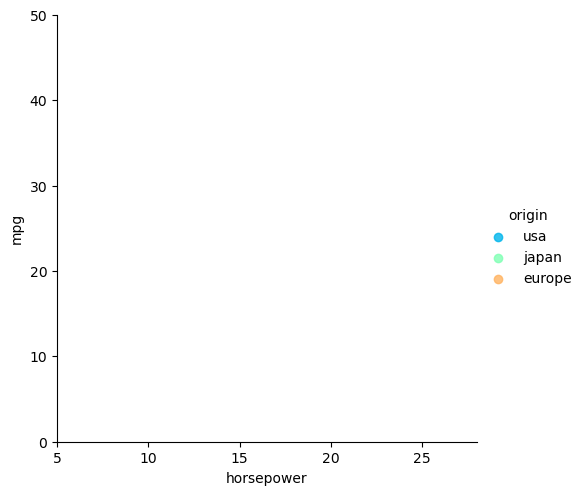

In [30]:
graph = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(ylim = (0, 50))
graph.set(xlim = (5, 28))
plt.show()

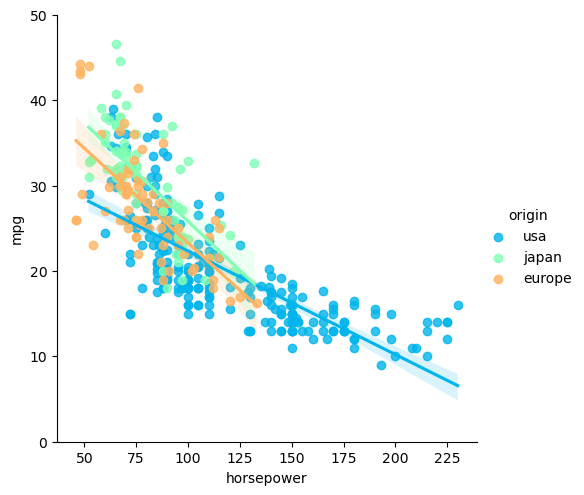

In [31]:
graph = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(ylim = (0, 50))
plt.show()

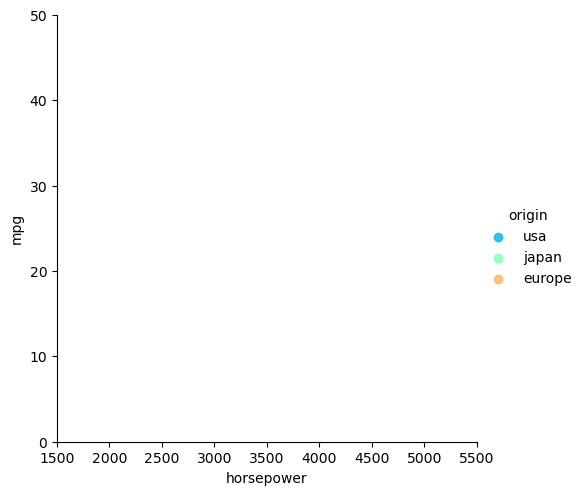

In [32]:
graph = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(ylim = (0, 50))
graph.set(xlim = (1500, 5500))
plt.show()

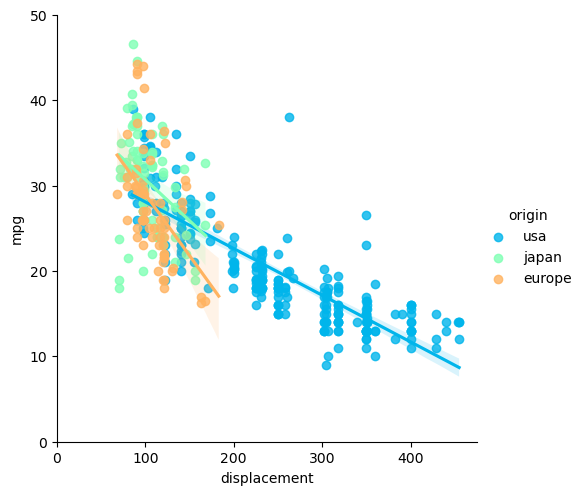

In [33]:
graph = sns.lmplot(x = 'displacement', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
graph.set(ylim = (0, 50))
graph.set(xlim = (0, 475))
plt.show()

In [34]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa
394,44.0,4,97.0,52.0,2130,24.6,1982,europe
395,32.0,4,135.0,84.0,2295,11.6,1982,usa
396,28.0,4,120.0,79.0,2625,18.6,1982,usa


**Heat map of the correlation matrix**

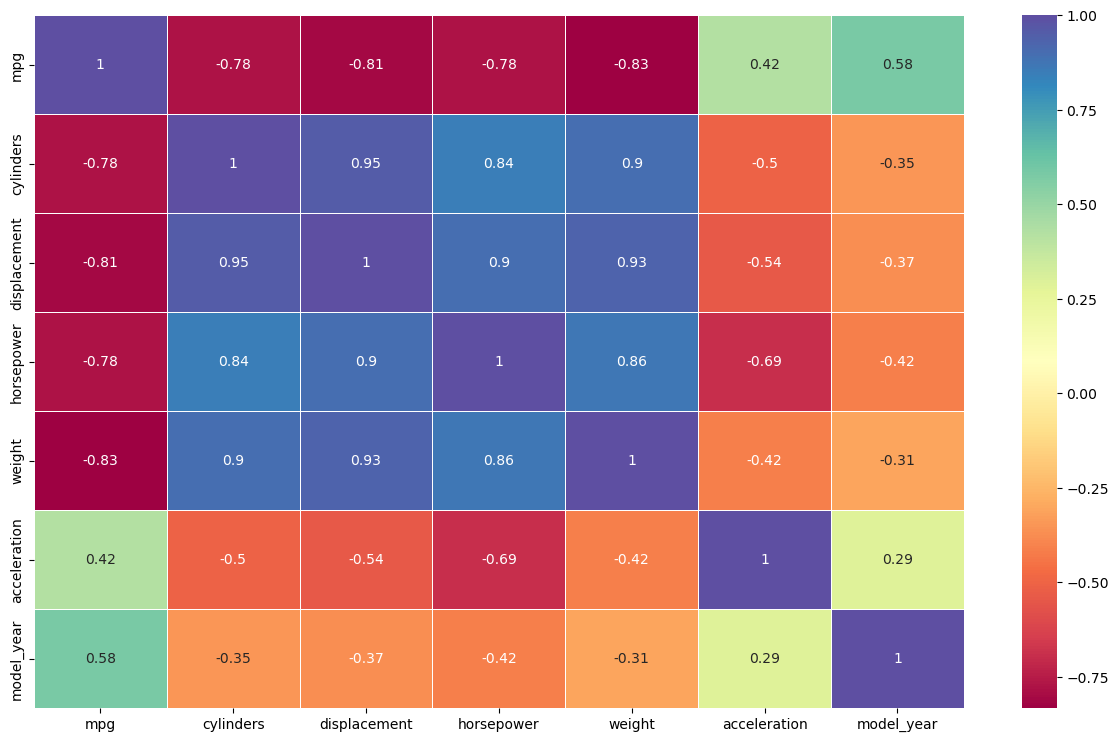

In [35]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'Spectral')
plt.show()

In [38]:
df.drop(['acceleration', 'displacement'], axis = 1, inplace = True)

In [39]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


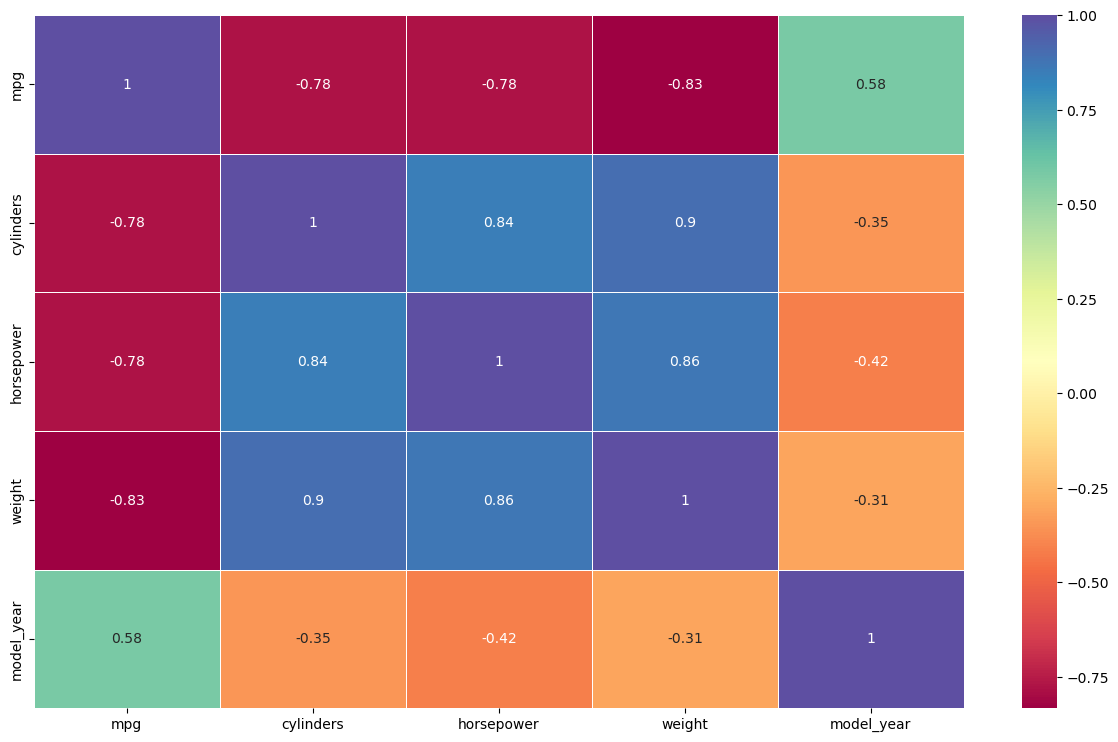

In [40]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'Spectral')
plt.show()

In [41]:
from datetime import datetime

In [42]:
today = datetime.today()

In [43]:
today

datetime.datetime(2023, 12, 10, 10, 54, 33, 959777)

In [44]:
year = today.year

In [45]:
year

2023

In [46]:
df['age'] = year -df.model_year

In [47]:
df.drop(['model_year'], axis = 1, inplace = True)

In [48]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,53
1,15.0,8,165.0,3693,usa,53
2,18.0,8,150.0,3436,usa,53
3,16.0,8,150.0,3433,usa,53
4,17.0,8,140.0,3449,usa,53


In [49]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [50]:
df = pd.get_dummies(df, drop_first = True)

In [51]:
df

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,53,0,1
1,15.0,8,165.0,3693,53,0,1
2,18.0,8,150.0,3436,53,0,1
3,16.0,8,150.0,3433,53,0,1
4,17.0,8,140.0,3449,53,0,1
...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,41,0,1
394,44.0,4,52.0,2130,41,0,0
395,32.0,4,84.0,2295,41,0,1
396,28.0,4,79.0,2625,41,0,1


In [52]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,53,0,1
1,15.0,8,165.0,3693,53,0,1
2,18.0,8,150.0,3436,53,0,1
3,16.0,8,150.0,3433,53,0,1
4,17.0,8,140.0,3449,53,0,1


**Modeling**

In [53]:
x = df.drop(['mpg'], axis = 1)
y = df['mpg']

In [54]:
x

,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,8,130.0,3504,53,0,1
1,8,165.0,3693,53,0,1
2,8,150.0,3436,53,0,1
3,8,150.0,3433,53,0,1
4,8,140.0,3449,53,0,1
...,...,...,...,...,...,...
393,4,86.0,2790,41,0,1
394,4,52.0,2130,41,0,0
395,4,84.0,2295,41,0,1
396,4,79.0,2625,41,0,1


In [55]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [58]:
x_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,45,0,1
184,4,92.0,2572,47,0,1
174,6,97.0,2984,48,0,1
64,8,150.0,4135,51,0,1
344,4,64.0,1875,42,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,51,0,1
107,6,100.0,2789,50,0,1
272,4,85.0,2855,45,0,1
352,4,65.0,2380,42,0,1


In [59]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [60]:
x_test

,cylinders,horsepower,weight,age,origin_japan,origin_usa
79,4,69.0,2189,51,0,0
276,4,115.0,2795,45,0,0
248,4,60.0,1800,45,1,0
56,4,70.0,1955,52,0,1
393,4,86.0,2790,41,0,1
...,...,...,...,...,...,...
366,6,85.0,3465,42,0,1
83,4,80.0,2164,51,0,1
115,8,145.0,4082,50,0,1
3,8,150.0,3433,53,0,1


In [61]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
ln_model = LinearRegression()

In [64]:
ln_model.fit(x_train, y_train)

LinearRegression()

In [65]:
ln_model.intercept_

79.02451674147221

In [66]:
ln_model.coef_

array([ 0.20305647, -0.01414264, -0.00572892, -0.7799043 ,  0.40185255,
       -2.38504739])

In [67]:
coef_param = pd.DataFrame(ln_model.coef_, index = x.columns, columns = ['Coefficient'])

In [68]:
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [69]:
y_pred = ln_model.predict(x_test)

In [71]:
my_dict = {'Actual': y_test, 'Pred' : y_pred}
compare = pd.DataFrame(my_dict)

In [72]:
compare.sample(10)

,Actual,Pred
270,21.1,29.391116
367,28.0,29.307229
394,44.0,34.922648
77,22.0,24.601463
34,16.0,16.116050
134,16.0,17.279368
296,27.4,26.708277
31,25.0,25.575986
235,26.0,30.326294
25,10.0,7.449357


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print('r2_score: ', SCORE, '\n', 'MAE: ', MAE, '\n', 'MSE: ', MSE, '\n', 'RMSE: ', RMSE)

In [84]:
evaluation_metrics(y_test, y_pred)

r2_score:  0.7798249880881912 
 MAE:  2.518828157615087 
 MSE:  11.237861022823035 
 RMSE:  3.3522919059686664


In [85]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ------- ------------------------------- 51.2/282.6 kB 1.3 MB/s eta 0:00:01
     ---------------------- --------------- 163.8/282.6 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 256.0/282.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00


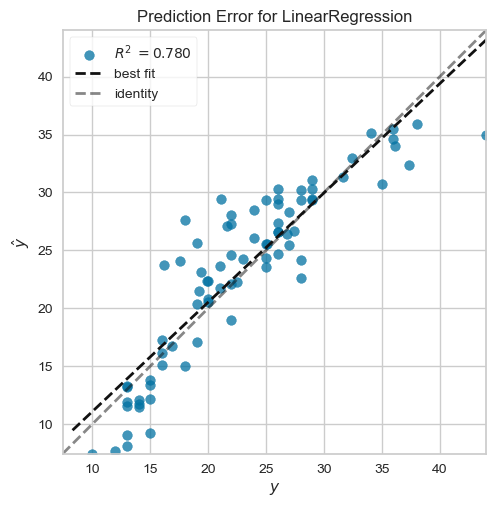

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [87]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(ln_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

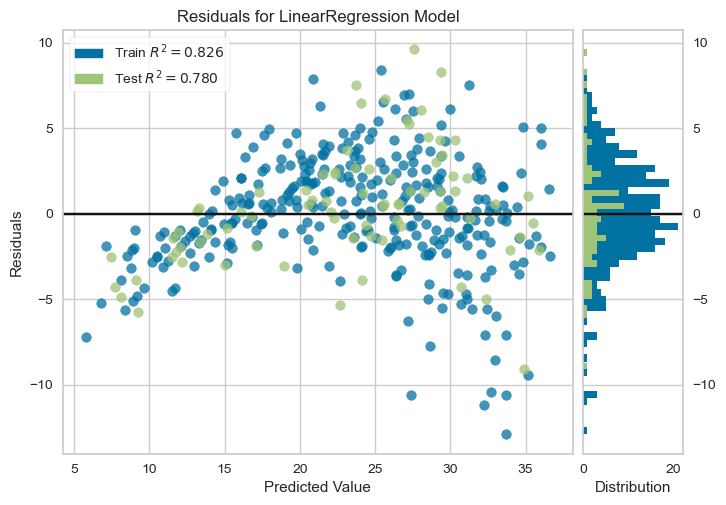

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [90]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(ln_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()